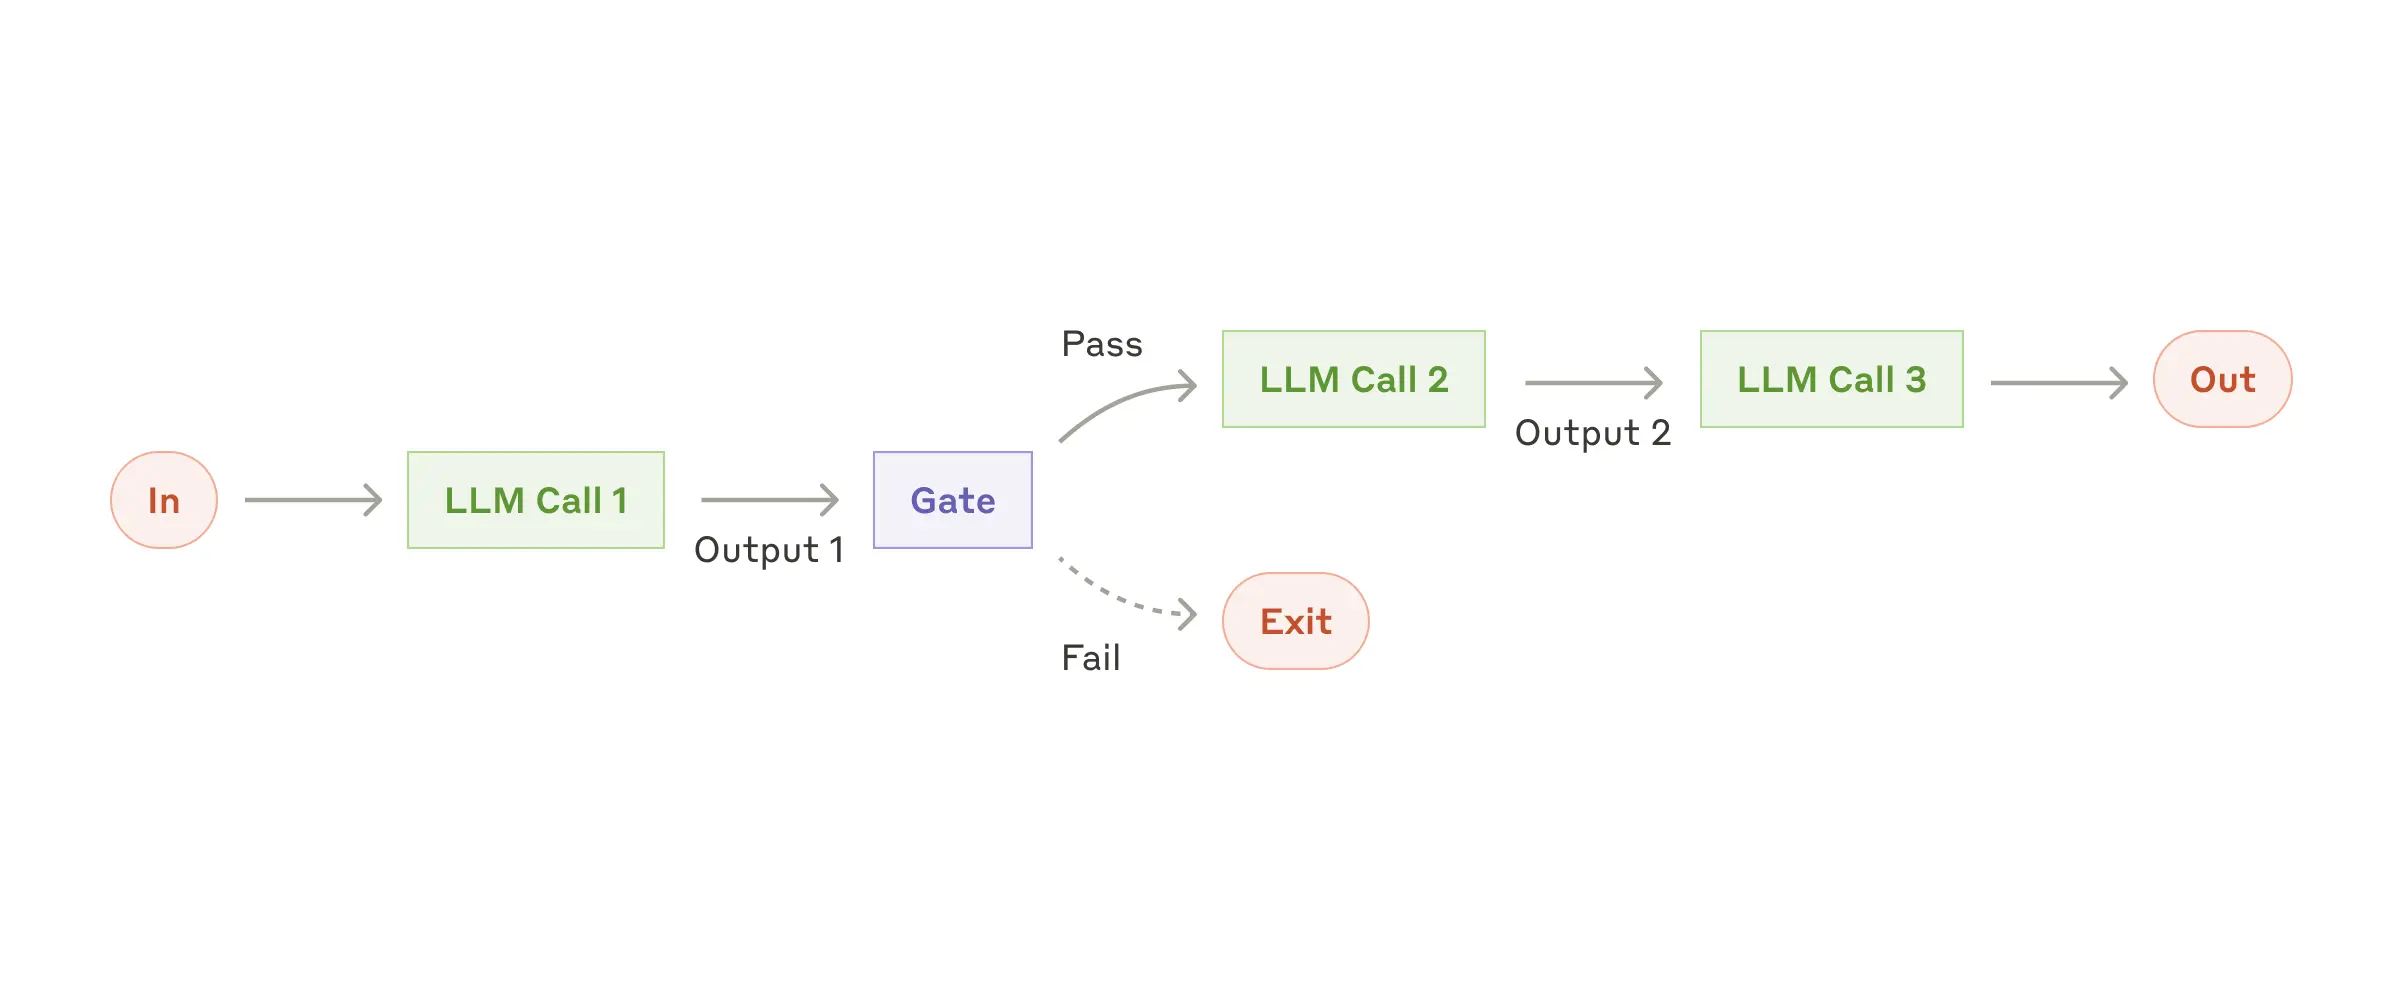

In [1]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Enter {var}: ")
    else:
        print(f"{var} already set")
        
_set_env("OPENAI_API_KEY")

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

OPENAI_API_KEY already set


In [2]:
from typing import TypedDict

class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str

In [3]:
#Nodes

def generate_joke(state: State):
    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}

def improve_joke(state: State):
    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}

def polish_joke(state: State):
    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}

def check_punchLine(state: State):
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Pass"
    return "Fail"

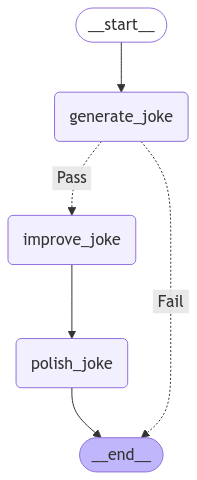

In [4]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

workflow = StateGraph(State)

workflow.add_node('generate_joke', generate_joke)
workflow.add_node('improve_joke', improve_joke)
workflow.add_node('polish_joke', polish_joke)

workflow.add_edge(START, 'generate_joke')
workflow.add_conditional_edges('generate_joke', check_punchLine, {
    "Pass": 'improve_joke',
    "Fail": END
})
workflow.add_edge('improve_joke', 'polish_joke')
workflow.add_edge('polish_joke', END)

chain = workflow.compile()

display(Image(chain.get_graph().draw_mermaid_png()))

In [10]:
state = chain.invoke({"topic": "cats"})
print(state['joke'])

print("\n--- --- ---\n")

if state.get("improved_joke"):
    print(state['improved_joke'])
else:
    print("No improved joke")
    
print("\n--- --- ---\n")
if state.get("final_joke"):
    print(state['final_joke'])
else:
    print("No final joke")

Why did the cat sit on the computer?

Because it wanted to keep an eye on the mouse!

--- --- ---

Why did the cat sit on the computer? 

Because it wanted to keep an eye on the mouse—the last time it didn’t, it lost its “purr-suing” interest in tech!

--- --- ---

Why did the cat sit on the computer? 

Because it wanted to keep an eye on the mouse—the last time it didn’t, it accidentally signed up for a cat video subscription, and now it’s the star of its own reality show!
